### Read Image

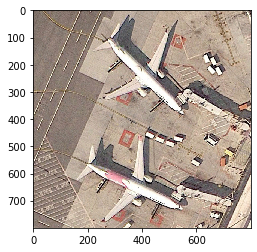

In [3]:
from PIL import Image
from matplotlib import pyplot as plt
img = Image.open('data/JPEGImages-trainval/00029.jpg')
plt.imshow(img)

In [8]:
np.asarray(img).shape

(800, 800, 3)

### Check Annotations

In [4]:
import pandas as pd
import numpy as np
import glob
import xml.etree.ElementTree as ET

classlist = ['ship','vehicle','airplane']
xml_list = []
tree = ET.parse('data/Annotations/00029.xml')
root = tree.getroot()
for member in root.findall('object'):
    if any (x in member.find('name').text for x in classlist):
        value = (root.find('filename').text,
                int(root.find('size')[0].text),
                int(root.find('size')[1].text),
                member.find('name').text,
                int(member.find('bndbox')[0].text),
                int(member.find('bndbox')[1].text),
                int(member.find('bndbox')[2].text),
                int(member.find('bndbox')[3].text)
                )
    xml_list.append(value)
    
column_name = ['filename', 'width', 'height','class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name)
xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,00029.jpg,800,800,airplane,215,44,557,386
1,00029.jpg,800,800,airplane,158,457,551,783
